In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
data = {
    "income": np.random.normal(60000, 15000, 200),
    "spending_habits": np.random.normal(3000, 800, 200),
    "savings": np.random.normal(15000, 5000, 200),
    "investment_preferences": np.random.normal(20000, 7000, 200)
}

df = pd.DataFrame(data)
df.head()

,income,spending_habits,savings,investment_preferences
0,51609.048438,3187.091184,13820.954913,901.074775
1,59726.968115,3062.549386,21144.879521,27671.943844
2,89702.704713,1931.550520,13367.931634,32130.198026
3,20594.991799,4180.043293,20563.976592,27942.359030
4,49172.043112,3126.679336,19862.428338,25711.266657


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   income                  200 non-null    float64
 1   spending_habits         200 non-null    float64
 2   savings                 200 non-null    float64
 3   investment_preferences  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [24]:
df.describe()

,income,spending_habits,savings,investment_preferences
count,200.000000,200.000000,200.000000,200.000000
mean,58960.552691,2951.518007,14670.737196,19613.216038
std,15264.863015,898.344523,5282.369590,6548.332131
min,13274.010159,592.471592,-1314.822089,901.074775
25%,48464.272303,2318.962581,11274.755866,14870.547215
50%,58728.201476,2985.172986,15153.682692,19546.289655
75%,67662.204766,3578.972008,18403.731913,24319.276961
max,103091.060269,5066.105159,26829.967168,35231.410417


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [26]:
# Apply PCA to standardized dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio (Each Component):")
print(explained_variance)

print("\nCumulative Explained Variance:")
print(cumulative_variance)

Explained Variance Ratio (Each Component):
[0.27972077 0.25975727 0.23922609 0.22129587]

Cumulative Explained Variance:
[0.27972077 0.53947804 0.77870413 1.        ]


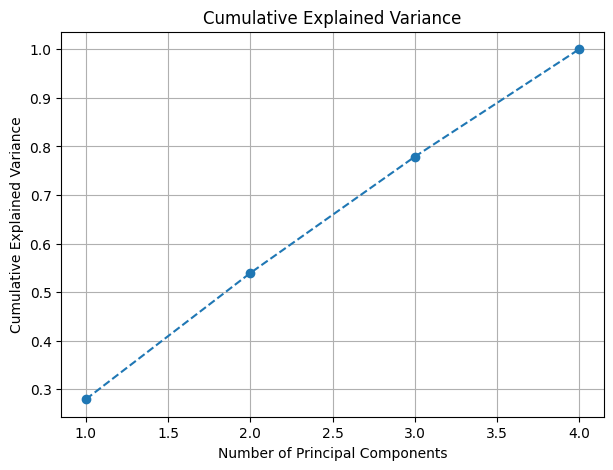

In [27]:
# Plot cumulative variance
plt.figure(figsize=(7,5))
plt.plot(range(1, len(df.columns)+1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [28]:
# Automatically select components covering 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Selected Number of Components (90% variance): {n_components}")

Selected Number of Components (90% variance): 4


In [29]:
# Apply PCA again using selected number of components
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

print(f"Reduced dataset shape: {X_reduced.shape}")

Reduced dataset shape: (200, 4)


In [30]:
# Display the principal components (feature contributions)
components = pd.DataFrame(
    pca_final.components_,
    columns=df.columns,
    index=[f"PC{i+1}" for i in range(n_components)]
)

print("Principal Component Composition:")
print(components)

Principal Component Composition:
       income  spending_habits   savings  investment_preferences
PC1  0.633996        -0.512496 -0.551592               -0.176476
PC2 -0.256574        -0.092915 -0.476048                0.836011
PC3  0.387210         0.852362 -0.351232                0.013567
PC4  0.618295        -0.046842  0.588014                0.519381


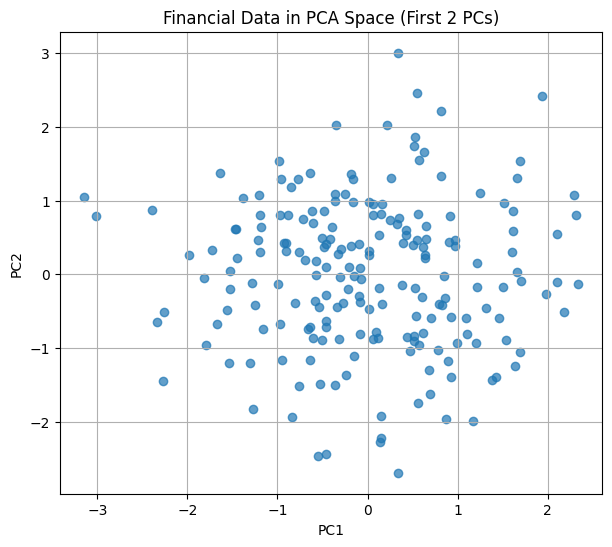

In [31]:
# Visualize Reduced Data (Only If 2 PCs)
if n_components >= 2:
    plt.figure(figsize=(7,6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Financial Data in PCA Space (First 2 PCs)")
    plt.grid()
    plt.show()

In [32]:
print("\n===== INSIGHTS BASED ON PCA =====")

if abs(components.loc["PC1"]).idxmax() == "income":
    print("PC1 is strongly driven by income → represents financial strength.")
if abs(components.loc["PC1"]).idxmax() == "spending_habits":
    print("PC1 is driven by spending → represents spending behavior.")
if abs(components.loc["PC1"]).idxmax() == "savings":
    print("PC1 is dominated by savings → represents saving tendency.")
if abs(components.loc["PC1"]).idxmax() == "investment_preferences":
    print("PC1 captures investment behavior.")

print("\nGeneral Interpretation:")
print("""
• PC1 usually represents overall financial power (income + savings + investments)
• PC2 often captures spending–saving trade-offs
• PCA reduces 4D financial data to simpler 2D or 3D patterns
• Helps identify customer groups (big earners, high spenders, investors, savers)
""")


===== INSIGHTS BASED ON PCA =====
PC1 is strongly driven by income → represents financial strength.

General Interpretation:

• PC1 usually represents overall financial power (income + savings + investments)
• PC2 often captures spending–saving trade-offs
• PCA reduces 4D financial data to simpler 2D or 3D patterns
• Helps identify customer groups (big earners, high spenders, investors, savers)

